In [1]:
from neuron import h

try:
    h.nrn_load_dll("../Models/Sanjay_model/x86_64/libnrnmech.so")
except:
    pass

h.load_file("stdrun.hoc")
h.tstop = 300

In [2]:
import sys

sys.path.append("../Models/Sanjay_model")

import os

print(os.getcwd())

x = os.listdir("../Models/Sanjay_model")
for i in x:
    print(i)

/home/Marc/Documents/internship/python_analysis/Notebooks
.git
CA1ih.mod
vecevent.mod
icapr.mod
ihpyrkop.mod
network.py
MyExp2SynNMDABB.mod
stats.hoc
decmat.hoc
MyExp2SynNMDA.mod
capr.mod
__pycache__
simctrl.hoc
init.hoc
CA1ikdr.mod
declist.hoc
networkmsj.py
syncode.hoc
Epileptic Activity.png
local.hoc
kdrbwb.mod
default.hoc
pyinit.py
labels.hoc
MyExp2SynBB.mod
readme.html
misc.mod
kdrolmkop.mod
kcaolmw.mod
CA1ina.mod
nafbwb.mod
decnqs.hoc
temp.py
kaolmkop.mod
kahppr.mod
xtmp
nqs_utils.hoc
stats.mod
x86_64
geom.py
misc.h
icaolmw.mod
nafpyrkop.mod
nrnoc.hoc
nafolmkop.mod
drline.hoc
kdrpyrkop.mod
kapyrkop.mod
iholmkop.mod
iholmw.mod
xgetargs.hoc
CA1ika.mod
decvec.hoc
wrap.mod
vecst.mod
kcpr.mod
MyExp2SynAlpha.mod
nafpr.mod
run.py
geom.hoc
MyExp2Syn.mod
kdrpr.mod
params.py
aux_fun.inc
mosinit.py
grvec.hoc
caolmw.mod
nqs.hoc


In [3]:
# Import necessary modules
import pickle
from geom import *  # Sanjay model geometry
from networkmsj import Population  # Sanjay model network
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import random
from scipy.signal import spectrogram

# Define the path to the data directory
data_directory = "../data/Data01_Baseline_Sanjay/"

# Create a dictionary to store the paths of pickle files
pkl_files = {}

# Iterate over the files in the data directory
for file_name in os.listdir(data_directory):
    if file_name.endswith(".pkl"):
        file_path = os.path.join(data_directory, file_name)
        pkl_files[file_name] = file_path

# Print the dictionary of pickle files
print(pkl_files)

# Define the path to the baseline population data pickle file
pickle_file_path = os.path.join(data_directory, "na_conductance_up_150_pops.pkl")

pickle_file_name = os.path.splitext(os.path.basename(pickle_file_path))[0]
print(pickle_file_name)

# Load the population data from the pickle file
with open(pickle_file_path, "rb") as f:
    populations = pickle.load(f)

Setting Cells
Setting Connections
PYR -> X , NMDA
PYR -> X , AMPA
BAS -> X , GABA
OLM -> PYR , GABA


NEURON: syntax error
 near line 1
 CTYP.o(PYRt).s="PYRt"
     ^
NEURON: syntax error
 near line 1
 CTYP.o(BASKETt).s="BASKETt"
     ^
NEURON: syntax error
 near line 1
 CTYP.o(OLMt).s="OLMt"
     ^
NEURON: syntax error
 near line 1
 CTYP.o(PSRt).s="PSRt"
     ^
NEURON: ix not an array variable
 near line 1
 ix[PYRt]=0
         ^
NEURON: ixe not an array variable
 near line 1
 ixe[PYRt]=799
          ^
NEURON: ix not an array variable
 near line 1
 ix[BASKETt]=800
            ^
NEURON: ixe not an array variable
 near line 1
 ixe[BASKETt]=999
             ^
NEURON: ix not an array variable
 near line 1
 ix[OLMt]=1000
         ^
NEURON: ixe not an array variable
 near line 1
 ixe[OLMt]=1199
          ^
NEURON: ix not an array variable
 near line 1
 ix[PSRt]=1200
         ^
NEURON: ixe not an array variable
 near line 1
 ixe[PSRt]=1200
          ^
NEURON: numc not an array variable
 near line 1
 numc[PYRt]=800
           ^
NEURON: numc not an array variable
 near line 1
 numc[BASKETt]=200


PYR -> PSR, AMPA/NMDA
set network from default constructor
{'baseline_pops.pkl': '../data/Data01_Baseline_SanjayOutput/baseline_pops.pkl', 'na_conductance_down_95_pops.pkl': '../data/Data01_Baseline_SanjayOutput/na_conductance_down_95_pops.pkl', 'na_conductance_up_105_pops.pkl': '../data/Data01_Baseline_SanjayOutput/na_conductance_up_105_pops.pkl', 'na_conductance_down_90_pops.pkl': '../data/Data01_Baseline_SanjayOutput/na_conductance_down_90_pops.pkl', 'na_conductance_up_110_pops.pkl': '../data/Data01_Baseline_SanjayOutput/na_conductance_up_110_pops.pkl', 'ka_g_150_pops.pkl': '../data/Data01_Baseline_SanjayOutput/ka_g_150_pops.pkl', 'ka_g_200_pops.pkl': '../data/Data01_Baseline_SanjayOutput/ka_g_200_pops.pkl', 'na_conductance_up_150_pops.pkl': '../data/Data01_Baseline_SanjayOutput/na_conductance_up_150_pops.pkl'}
na_conductance_up_150_pops


In [4]:
# Accessing individual populations
pyr_population = populations[0]
bas_population = populations[1]
olm_population = populations[2]
psr_population = populations[3]  # sensor cells, can mostly ignore


# # Accessing data within populations
# print(pyr_population.cell[0])
# print(pyr_population.ltimevec)
# print(pyr_population.cell[0].soma_volt)

_Spike times all cell populations_


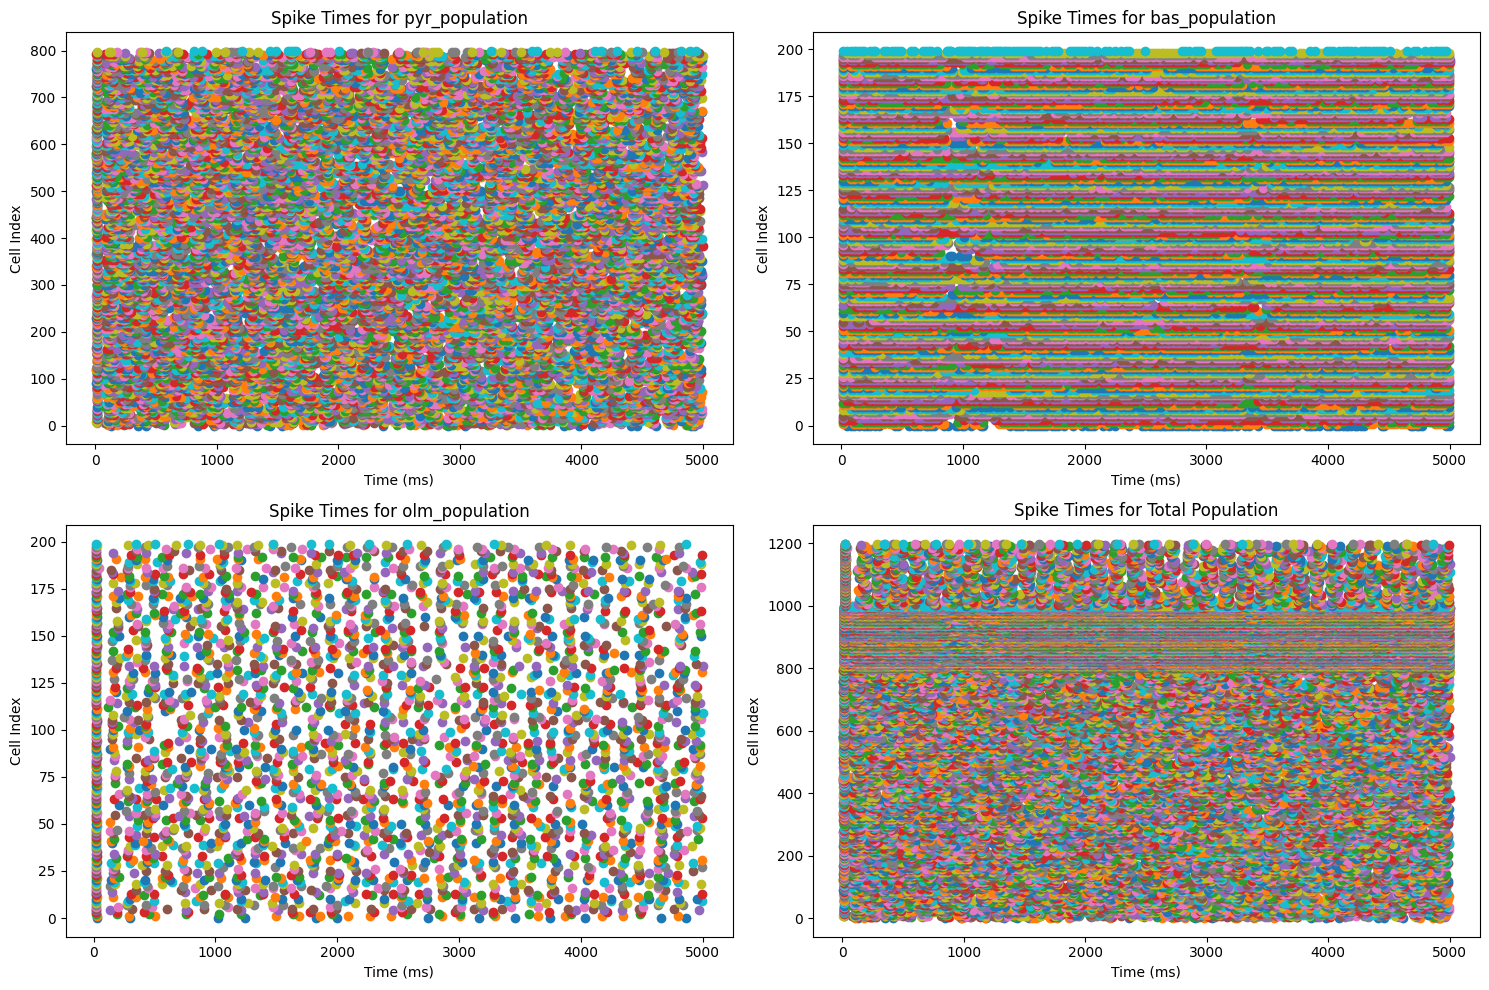

In [5]:
# Specify the folder path to save the figure
image_folder = "../imgs/Exp01_BaselineModelAnalysis/"

# Create the save_folder path
save_folder = os.path.join(image_folder, pickle_file_name)

# Create the folder if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

# List of populations containing 3 population elements
pop_list = [pyr_population, bas_population, olm_population]

# Specify names for populations
pop_names = ["pyr_population", "bas_population", "olm_population"]

# Calculate the number of subplots needed
num_subplots = len(pop_list)

# Calculate the number of rows and columns for subplots
num_rows = (num_subplots + 1) // 2  # Add 1 to handle odd number of subplots
num_cols = 2

# Create subplots for individual populations
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plot individual populations
for i, pop in enumerate(pop_list):
    axs[i // 2, i % 2].set_title(f"Spike Times for {pop_names[i]}")
    axs[i // 2, i % 2].set_xlabel("Time (ms)")
    axs[i // 2, i % 2].set_ylabel("Cell Index")

    num_cells = len(pop.ltimevec)
    for cell_index in range(num_cells):
        spike_times = pop.ltimevec[cell_index]
        axs[i // 2, i % 2].plot(
            spike_times,
            [cell_index] * len(spike_times),
            "o",
            label=f"Cell {cell_index + 1}",
        )

# Remove any empty subplots
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

# Create subplot for total population in the bottom right
ax_total = plt.subplot2grid(
    (num_rows, num_cols), (num_rows - 1, num_cols - 1), colspan=1
)
ax_total.set_title("Spike Times for Total Population")
ax_total.set_xlabel("Time (ms)")
ax_total.set_ylabel("Cell Index")

# Plot total population in the bottom right
total_y_limit = 1200  # Maximum y-axis limit for the total population plot
current_cell_index = 0

for i, pop in enumerate(pop_list):
    num_cells = len(pop.ltimevec)
    for cell_index in range(num_cells):
        if current_cell_index >= total_y_limit:
            break
        spike_times = pop.ltimevec[cell_index]
        ax_total.plot(
            spike_times,
            [current_cell_index] * len(spike_times),
            "o",
            label=f"{pop_names[i]} Cell {cell_index + 1}",
        )
        current_cell_index += 1

plt.tight_layout()

# Specify the figure name including the pickle file name
fig_name = f"spike_times_{pickle_file_name}.png"

# Specify the complete save path for the figure
save_path = os.path.join(save_folder, fig_name)

# Save the figure to the specified folder
plt.savefig(save_path)

# Show the figure
plt.show()

In [6]:
import pandas as pd

# Assuming you have loaded the pickled data and accessed the populations
# pop_list = [pyr_population, bas_population, olm_population]
# pop_names = ["pyr_population", "bas_population", "olm_population"]

# Define the time window for calculating firing rates
time_window = 5  # in milliseconds

# Calculate the firing rates per population
firing_rates = {}

for i, pop in enumerate(pop_list):
    pop_name = pop_names[i]
    num_cells = len(pop.ltimevec)
    rates = []

    for cell_index in range(num_cells):
        spike_times = pop.ltimevec[cell_index]
        num_spikes = len(spike_times)
        firing_rate = num_spikes / time_window  # convert time window to seconds
        rates.append(firing_rate)

    firing_rates[pop_name] = rates

    # # Print the firing rates per population
    # for pop_name, rates in firing_rates.items():
    #     print(f"Firing rates for {pop_name}:")
    #     for cell_index, rate in enumerate(rates):
    #         print(f"Cell {cell_index + 1}: {rate} Hz")
    #     print()

    # Create a dictionary to store the firing rates per population
    firing_rates_dict = {}

    # Find the maximum length of firing rates
    max_length = max(len(rates) for rates in firing_rates.values())

    # Pad the shorter arrays with NaN values
    for pop_name, rates in firing_rates.items():
        padded_rates = rates + [float("nan")] * (max_length - len(rates))
        firing_rates_dict[pop_name] = padded_rates

    # Create the dataframe
    df_firing_rates = pd.DataFrame(firing_rates_dict)

# Show the dataframe
df_firing_rates

# average per population
average_firing_rates = df_firing_rates.mean()
print(average_firing_rates)

pyr_population     4.679
bas_population    27.743
olm_population     3.024
dtype: float64


_Raster plot_

Instead of plotting each spike as a point on the y-axis, you can use a raster plot where each line represents the spike times of a single cell. This can help visualize the overall activity pattern.


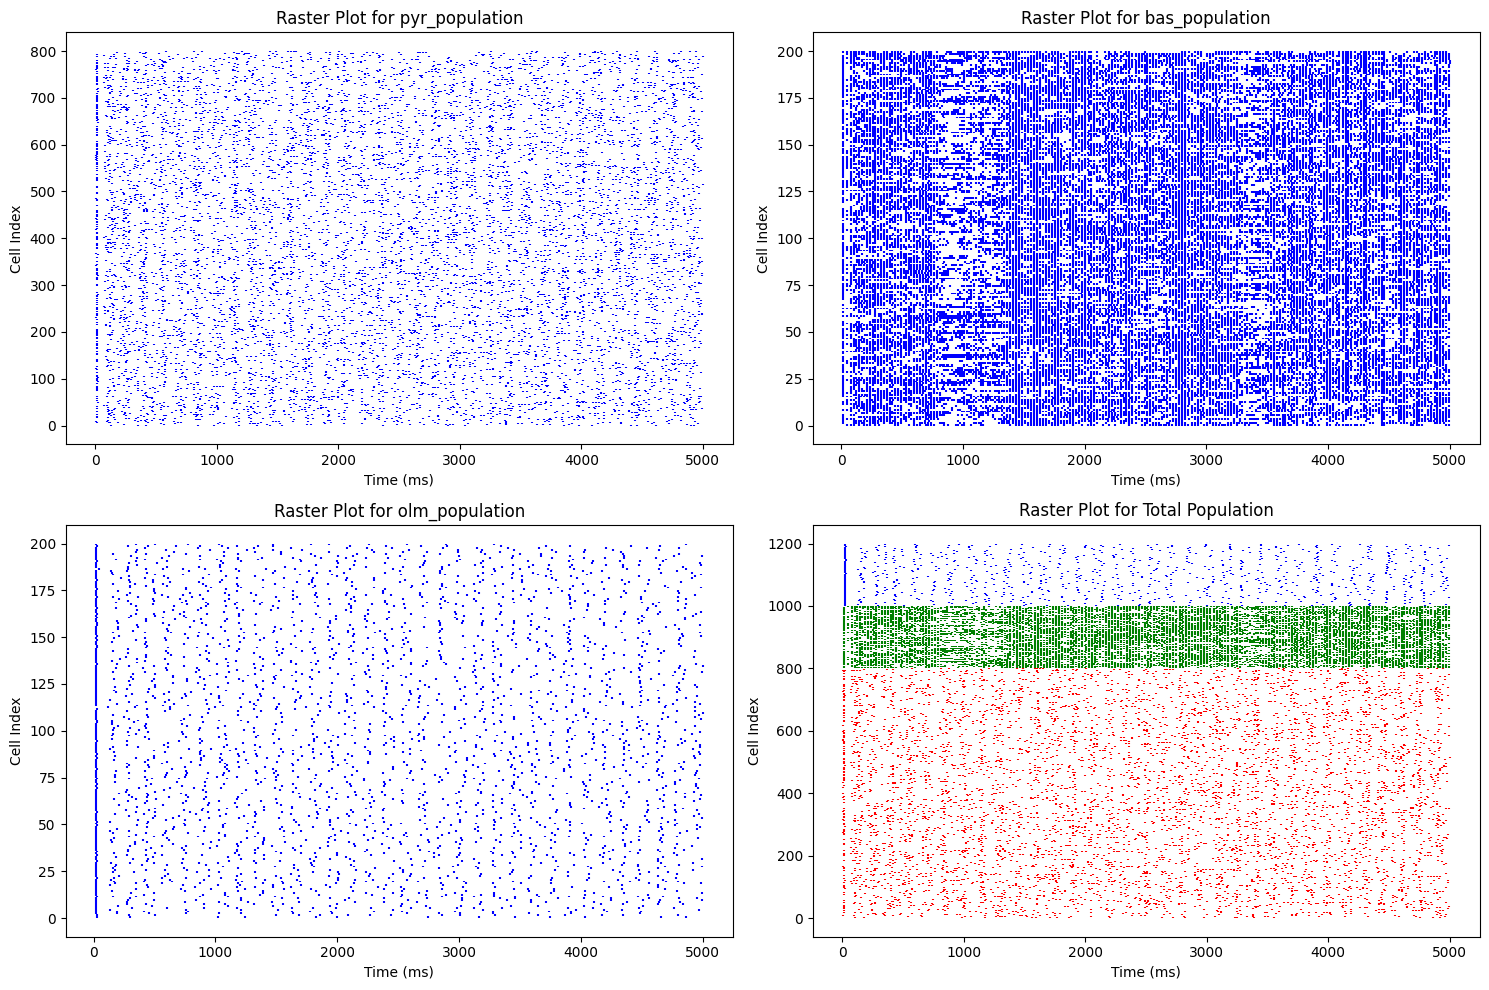

In [7]:
# Assuming you have loaded the pickled data and accessed the populations
# pop_list = [pyr_population, bas_population, olm_population]
# pop_names = ["pyr_population", "bas_population", "olm_population"]

# Define colors for each population
pop_colors = {
    "pyr_population": "red",
    "bas_population": "green",
    "olm_population": "blue",
}

# Calculate the number of subplots needed
num_subplots = len(pop_list)

# Calculate the number of rows and columns for subplots
num_rows = (num_subplots + 1) // 2  # Add 1 to handle odd number of subplots
num_cols = 2

# Create subplots for individual populations
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plot raster plots for individual populations
for i, pop in enumerate(pop_list):
    axs[i // 2, i % 2].set_title(f"Raster Plot for {pop_names[i]}")
    axs[i // 2, i % 2].set_xlabel("Time (ms)")
    axs[i // 2, i % 2].set_ylabel("Cell Index")

    num_cells = len(pop.ltimevec)
    for cell_index in range(num_cells):
        spike_times = pop.ltimevec[cell_index]
        axs[i // 2, i % 2].vlines(
            spike_times, cell_index, cell_index + 1, "b"
        )  # better to make a list of x and y values and then plot, for optimization!

# Remove any empty subplots
for i in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

# Create subplot for total population in the bottom right
ax_total = plt.subplot2grid(
    (num_rows, num_cols), (num_rows - 1, num_cols - 1), colspan=1
)
ax_total.set_title("Raster Plot for Total Population")
ax_total.set_xlabel("Time (ms)")
ax_total.set_ylabel("Cell Index")

# Plot raster plot for total population in the bottom right
total_y_limit = 1200  # Maximum y-axis limit for the total population plot
current_cell_index = 0

for i, pop in enumerate(pop_list):
    num_cells = len(pop.ltimevec)
    for cell_index in range(num_cells):
        if current_cell_index >= total_y_limit:
            break
        spike_times = pop.ltimevec[cell_index]
        ax_total.vlines(
            spike_times,
            current_cell_index,
            current_cell_index + 1,
            color=pop_colors[pop_names[i]],
        )
        current_cell_index += 1


for i, pop in enumerate(pop_list):
    x = pop.ltimevec
    for k, cell in enumerate(pop.cell):
        cell.spike_times = x[k]

plt.tight_layout()

# Specify the figure name including the pickle file name
fig_name = f"rasterplot_spike_times_{pickle_file_name}.png"

# Specify the complete save path for the figure
save_path = os.path.join(save_folder, fig_name)

# Save the figure to the specified folder
plt.savefig(save_path)

plt.show()

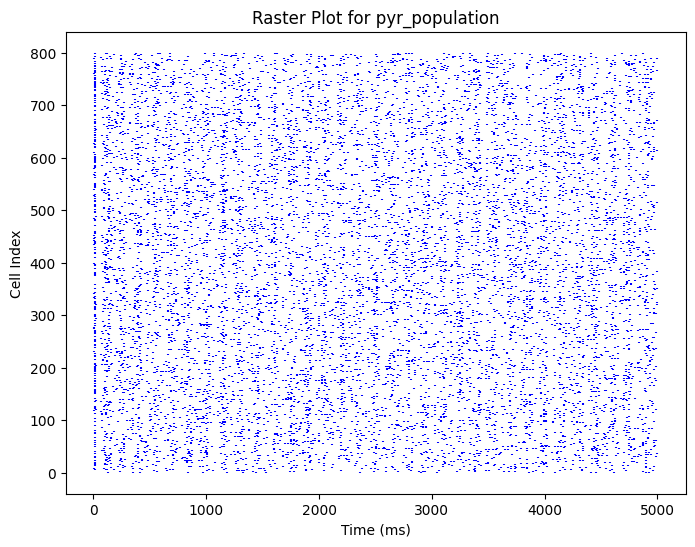

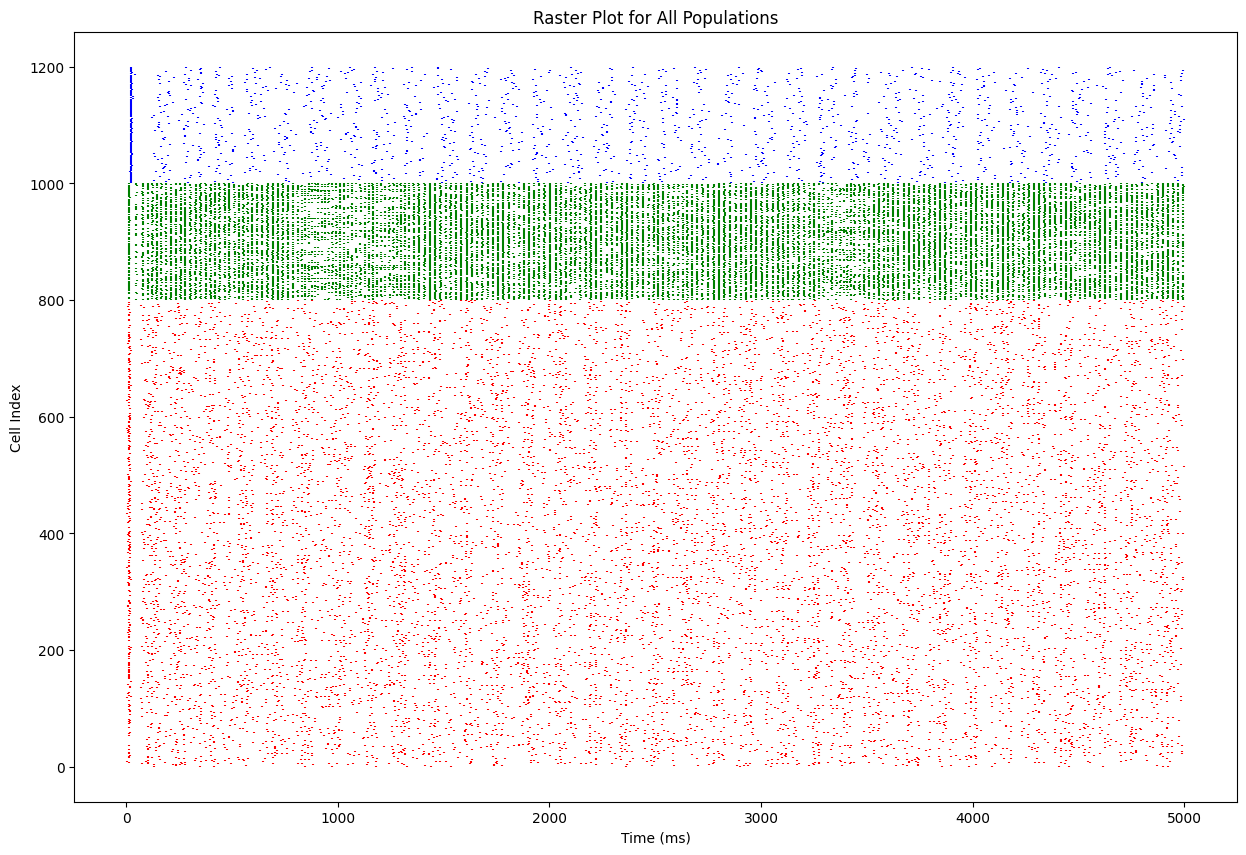

In [8]:
import matplotlib.pyplot as plt
import os


def calculate_spike_times(pop_list):
    spike_times_list = []

    for pop in pop_list:
        pop_spike_times = []
        for cell_index in range(len(pop.ltimevec)):
            spike_times = pop.ltimevec[cell_index]
            pop_spike_times.append(spike_times)
        spike_times_list.append(pop_spike_times)

    return spike_times_list


def plot_single_population(pop, pop_name):
    plt.figure(figsize=(8, 6))
    plt.title(f"Raster Plot for {pop_name}")
    plt.xlabel("Time (ms)")
    plt.ylabel("Cell Index")

    for cell_index in range(len(pop.ltimevec)):
        spike_times = pop.ltimevec[cell_index]
        plt.vlines(
            spike_times, cell_index, cell_index + 1, "b"
        )  # 'b' for blue, you can customize the color

    plt.show()


def plot_all_populations(pop_list, pop_names, pop_colors):
    plt.figure(figsize=(15, 10))

    current_cell_index = 0

    for i, pop in enumerate(pop_list):
        num_cells = len(pop.ltimevec)
        for cell_index in range(num_cells):
            spike_times = pop.ltimevec[cell_index]
            plt.vlines(
                spike_times,
                current_cell_index,
                current_cell_index + 1,
                color=pop_colors[pop_names[i]],
            )
            current_cell_index += 1

    plt.title("Raster Plot for All Populations")
    plt.xlabel("Time (ms)")
    plt.ylabel("Cell Index")

    plt.show()


# Assuming you have loaded the pickled data and accessed the populations
# pop_list = [pyr_population, bas_population, olm_population]
# pop_names = ["pyr_population", "bas_population", "olm_population"]
# pop_colors = {'pyr_population': 'red', 'bas_population': 'green', 'olm_population': 'blue'}

# Call the function to calculate spike times
spike_times_list = calculate_spike_times(pop_list)

# Call the function to plot a single population
plot_single_population(pop_list[0], pop_names[0])

# Call the function to plot all populations together
plot_all_populations(pop_list, pop_names, pop_colors)

# Call the function to calculate spike times
spike_times_list = calculate_spike_times(pop_list)

_Smoothing_

Apply a smoothing technique to the spike train data, such as a kernel density estimate (KDE), to highlight patterns in the spiking activity.


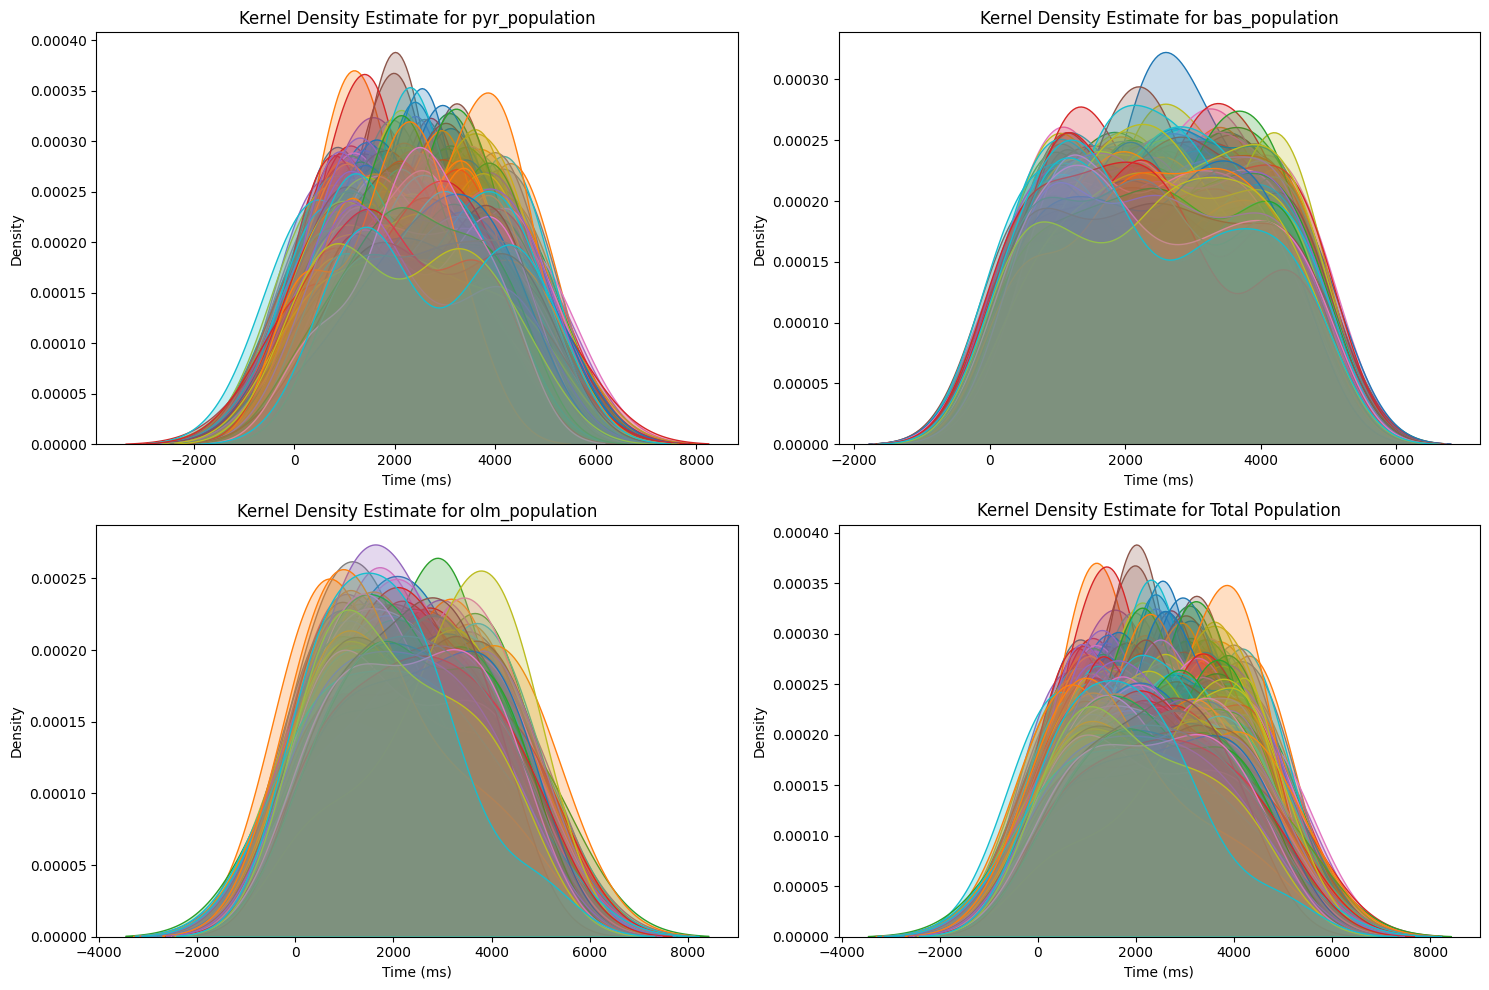

In [9]:
# Assuming you have loaded the pickled data and accessed the populations
# pop_list = [pyr_population, bas_population, olm_population]
# pop_names = ["pyr_population", "bas_population", "olm_population"]

# Calculate the number of subplots needed
num_subplots = len(pop_list)

# Calculate the number of rows and columns for subplots
num_rows = (num_subplots + 1) // 2  # Add 1 to handle odd number of subplots
num_cols = 2

# Create subplots for individual populations
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plot kernel density estimate for individual populations
for i, (pop, ax) in enumerate(zip(pop_list, axs.flatten())):
    ax.set_title(f"Kernel Density Estimate for {pop_names[i]}")
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Density")

    num_cells = len(pop.ltimevec)
    for cell_index in range(num_cells):
        spike_times = pop.ltimevec[cell_index]
        sns.kdeplot(spike_times, label=f"Cell {cell_index + 1}", fill=True, ax=ax)

# Create subplot for total population in the bottom right
ax_total = axs.flatten()[-1]
ax_total.set_title("Kernel Density Estimate for Total Population")
ax_total.set_xlabel("Time (ms)")
ax_total.set_ylabel("Density")

# Plot kernel density estimate for total population in the bottom right
total_y_limit = 1200  # Maximum y-axis limit for the total population plot

for i, pop in enumerate(pop_list):
    num_cells = len(pop.ltimevec)
    for cell_index in range(min(num_cells, total_y_limit)):
        spike_times = pop.ltimevec[cell_index]
        sns.kdeplot(
            spike_times,
            label=f"{pop_names[i]} Cell {cell_index + 1}",
            fill=True,
            ax=ax_total,
        )

plt.tight_layout()

# Specify the figure name including the pickle file name
fig_name = f"KDE_plot_{pickle_file_name}.png"

# Specify the complete save path for the figure
save_path = os.path.join(save_folder, fig_name)

# Save the figure to the specified folder
plt.savefig(save_path)

plt.show()

_soma voltage_


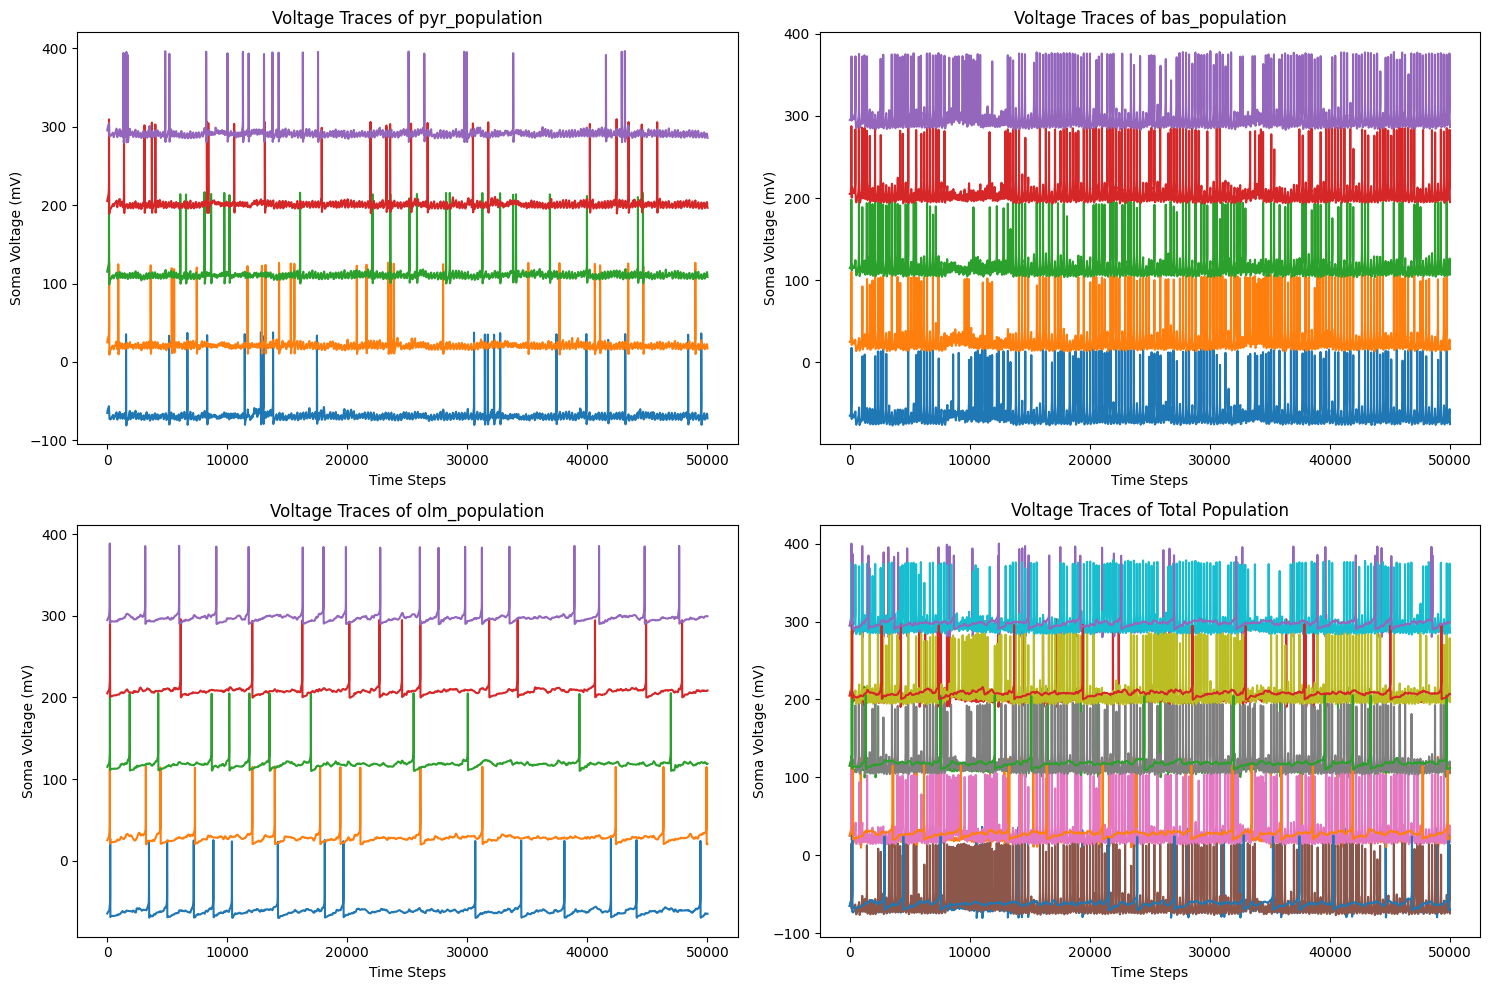

In [10]:
# Calculate the number of subplots needed
num_subplots = len(pop_list)

# Calculate the number of rows and columns for subplots
num_rows = (num_subplots + 1) // 2  # Add 1 to handle an odd number of subplots
num_cols = 2

# Create subplots for individual populations
fig, axs_voltage = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plot voltage traces for individual populations
for i, (pop, axs) in enumerate(zip(pop_list, axs_voltage.flatten())):
    axs.set_title(f"Voltage Traces of {pop_names[i]}")
    axs.set_xlabel("Time Steps")
    axs.set_ylabel("Soma Voltage (mV)")

    # Randomly select 5 cell indices
    cell_indices = random.sample(range(len(pop.cell)), 5)

    for j, cell_index in enumerate(cell_indices):
        cell = pop.cell[cell_index]
        offset = j * 90  # Adjust the offset value as needed
        axs.plot(cell.soma_volt + offset, label=f"{pop_names[i]} Cell {cell_index + 1}")

# Create subplot for total population in the bottom right
ax_total_voltage = axs_voltage.flatten()[-1]
ax_total_voltage.set_title("Voltage Traces of Total Population")
ax_total_voltage.set_xlabel("Time Steps")
ax_total_voltage.set_ylabel("Soma Voltage (mV)")

# Plot voltage traces for the total population in the bottom right
total_y_limit = 1200  # Maximum y-axis limit for the total population plot
current_cell_index = 0

for i, pop in enumerate(pop_list):
    # Randomly select 5 cell indices
    cell_indices = random.sample(range(len(pop.cell)), 5)

    for j, cell_index in enumerate(cell_indices):
        if current_cell_index >= total_y_limit:
            break
        cell = pop.cell[cell_index]
        offset = j * 90  # Adjust the offset value as needed
        ax_total_voltage.plot(
            cell.soma_volt + offset, label=f"{pop_names[i]} Cell {cell_index + 1}"
        )
        current_cell_index += 1

plt.tight_layout()

# Specify the figure name including the pickle file name
fig_name = f"voltage_traces_{pickle_file_name}.png"

# Specify the complete save path for the figure
save_path = os.path.join(save_folder, fig_name)

# Save the figure to the specified folder
plt.savefig(save_path)

plt.show()

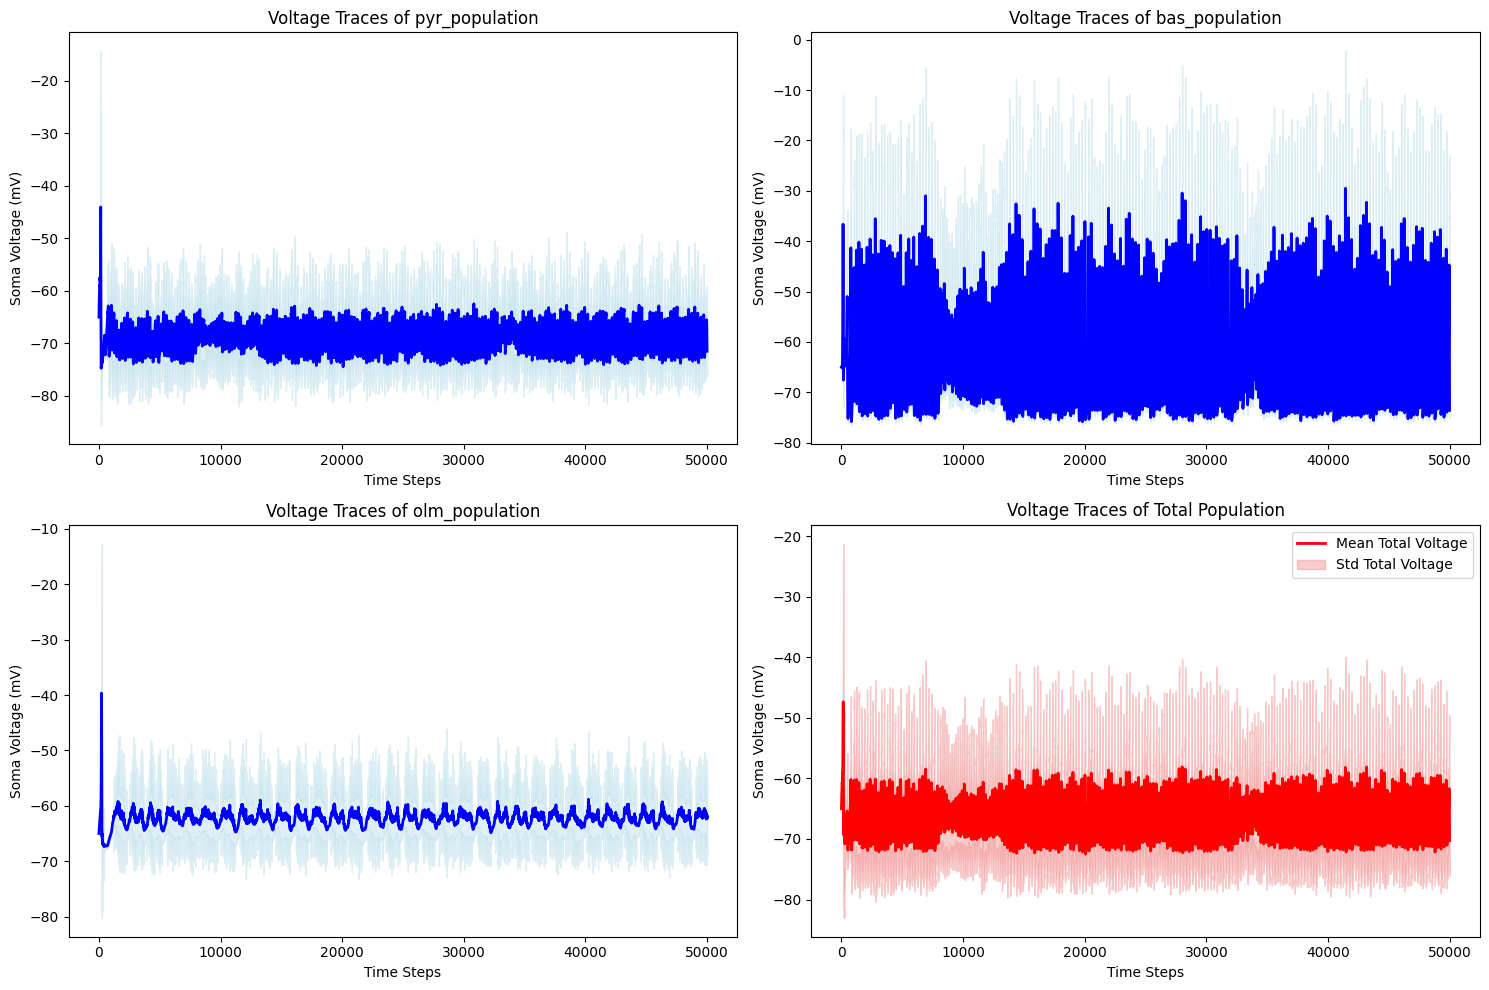

In [11]:
# Calculate the number of subplots needed
num_subplots = len(pop_list)

# Calculate the number of rows and columns for subplots
num_rows = (num_subplots + 1) // 2  # Add 1 to handle an odd number of subplots
num_cols = 2

# Create subplots for individual populations
fig, axs_voltage = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plot mean and std voltage for each population
for i, (pop, axs) in enumerate(zip(pop_list, axs_voltage.flatten())):
    axs.set_title(f"Voltage Traces of {pop_names[i]}")
    axs.set_xlabel("Time Steps")
    axs.set_ylabel("Soma Voltage (mV)")

    # Calculate mean and std voltage
    voltage_data = [cell.soma_volt for cell in pop.cell]
    mean_voltage = np.mean(voltage_data, axis=0)
    std_voltage = np.std(voltage_data, axis=0)

    # Plot mean voltage with a solid line in blue
    axs.plot(
        mean_voltage,
        label=f"Mean {pop_names[i]} Voltage",
        linestyle="-",
        linewidth=2,
        color="blue",
    )

    # Plot std voltage with a shaded area in light blue
    axs.fill_between(
        range(len(mean_voltage)),
        mean_voltage - std_voltage,
        mean_voltage + std_voltage,
        color="lightblue",
        alpha=0.4,
        label=f"Std {pop_names[i]} Voltage",
    )

# Create subplot for total population in the bottom right
ax_total_voltage = axs_voltage[-1, -1]
ax_total_voltage.set_title("Voltage Traces of Total Population")
ax_total_voltage.set_xlabel("Time Steps")
ax_total_voltage.set_ylabel("Soma Voltage (mV)")

# Calculate mean and std voltage for the total population
total_voltage_data = [cell.soma_volt for pop in pop_list for cell in pop.cell]
total_mean_voltage = np.mean(total_voltage_data, axis=0)
total_std_voltage = np.std(total_voltage_data, axis=0)

# Plot mean voltage with a solid line in red
ax_total_voltage.plot(
    total_mean_voltage,
    label="Mean Total Voltage",
    linestyle="-",
    linewidth=2,
    color="red",
)

# Plot std voltage with a shaded area in light red
ax_total_voltage.fill_between(
    range(len(total_mean_voltage)),
    total_mean_voltage - total_std_voltage,
    total_mean_voltage + total_std_voltage,
    color="lightcoral",
    alpha=0.4,
    label="Std Total Voltage",
)

plt.tight_layout()
plt.legend()

# Specify the figure name including the pickle file name
fig_name = f"mean_voltage_traces_{pickle_file_name}.png"

# Specify the complete save path for the figure
save_path = os.path.join(save_folder, fig_name)

# Save the figure to the specified folder
plt.savefig(save_path)

plt.show()

dict_keys([])
{}


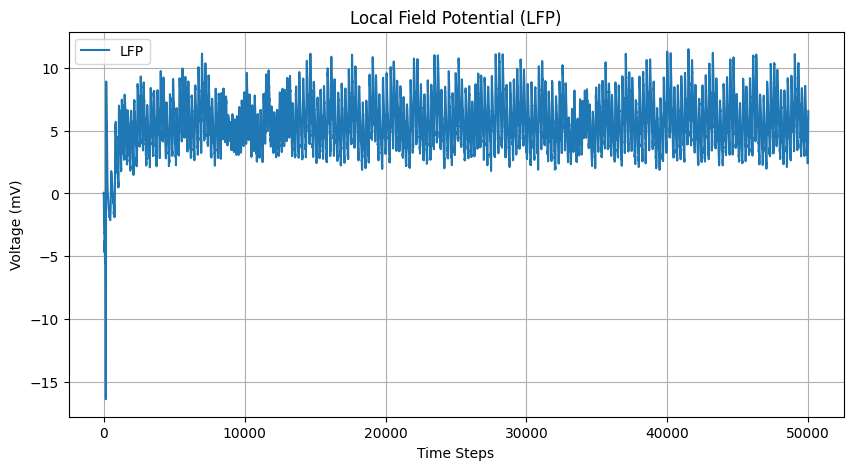

In [12]:
import sys

sys.path.append("/home/Marc/Documents/internship/python_analysis/")

from src.SanjayCode import (
    calc_lfp_from_population,
)  # Import the specific function you need

# Call the function with your data
lfp_result = calc_lfp_from_population(pyr_population)

# Assuming lfp_result and time_vector are available in your data
plt.figure(figsize=(10, 5))
plt.plot(lfp_result, label="LFP")
plt.title("Local Field Potential (LFP)")
plt.xlabel("Time Steps")
plt.ylabel("Voltage (mV)")
plt.legend()
plt.grid(True)

# Specify the figure name including the pickle file name
fig_name = f"LFP_signal_{pickle_file_name}.png"

# Specify the complete save path for the figure
save_path = os.path.join(save_folder, fig_name)

# Save the figure to the specified folder
plt.savefig(save_path)

plt.show()

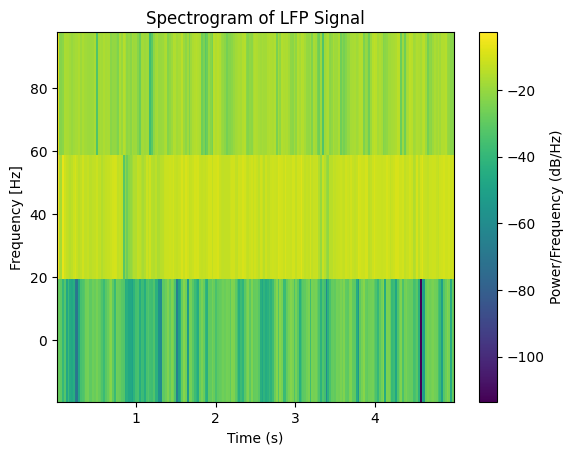

In [13]:
# Assuming lfp_signal is your LFP signal and sampling_rate is the sampling rate of your signal
lfp_signal = lfp_result  # Replace with your LFP signal
sampling_rate = 10000  # Replace with your sampling rate

# Set the desired frequency range (adjust as needed)
freq_range = (0, 100)  # Example: Plot frequencies up to 100 Hz

# Create spectrogram using scipy.signal.spectrogram
frequencies, times, Sxx = spectrogram(lfp_signal, fs=sampling_rate, nperseg=256)

# Find indices corresponding to the specified frequency range
freq_indices = np.where(
    (frequencies >= freq_range[0]) & (frequencies <= freq_range[1])
)[0]

# Plot the spectrogram with the specified frequency range
plt.pcolormesh(
    times,
    frequencies[freq_indices],
    10 * np.log10(Sxx[freq_indices, :]),
    shading="auto",
)
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time (s)")
plt.title("Spectrogram of LFP Signal")
plt.colorbar(label="Power/Frequency (dB/Hz)")

# Specify the figure name including the pickle file name
fig_name = f"Spectrogram_{pickle_file_name}.png"

# Specify the complete save path for the figure
save_path = os.path.join(save_folder, fig_name)

# Save the figure to the specified folder
plt.savefig(save_path)

plt.show()

In [14]:
from src.SanjayCode import power_in_range

# Define frequency ranges for gamma and theta bands
gamma_band = (30, 80)  # replace with your desired gamma band range in Hz
theta_band = (4, 8)  # replace with your desired theta band range in Hz

# Use the power_in_range function to extract scalar power and power vector within the specified frequency ranges
gamma_scalar_power, gamma_power_vector = power_in_range(Sxx, frequencies, gamma_band)
theta_scalar_power, theta_power_vector = power_in_range(Sxx, frequencies, theta_band)


# Print or use scalar power and power vector as needed
print("Gamma Scalar Power:", gamma_scalar_power)
print("Gamma Power Vector:", gamma_power_vector)
print("Theta Scalar Power:", theta_scalar_power)
print("Theta Power Vector:", theta_power_vector)

Gamma Scalar Power: [0.79412407 0.02932687 0.02242415 0.21343397 0.10042051 0.07036615
 0.06007609 0.04428067 0.05384941 0.08069146 0.12096372 0.07469789
 0.06011454 0.05999562 0.10831784 0.06310397 0.06314586 0.06799822
 0.05039591 0.05172856 0.05947906 0.07290646 0.06810639 0.06049301
 0.06868136 0.04617679 0.06304954 0.07046981 0.07713357 0.07770348
 0.07481351 0.10445525 0.11476589 0.09817014 0.04875313 0.07595497
 0.05326067 0.03218884 0.02756104 0.00921495 0.01611385 0.0138876
 0.03016132 0.04014225 0.03808995 0.05785097 0.04453037 0.03969747
 0.03513348 0.0398083  0.0799266  0.0548651  0.07853951 0.03123111
 0.03410841 0.05678955 0.03980645 0.03411511 0.04480731 0.05191043
 0.0807606  0.09462231 0.07393914 0.08523458 0.08505598 0.1196273
 0.08291999 0.06559741 0.08519058 0.09179044 0.15118966 0.07389025
 0.11669021 0.09942277 0.0539167  0.07231012 0.09521191 0.13614076
 0.12885351 0.12489822 0.07571868 0.05551416 0.05849727 0.05314959
 0.06369054 0.10585535 0.10064028 0.0523362 

_Visualize the Power over Time_


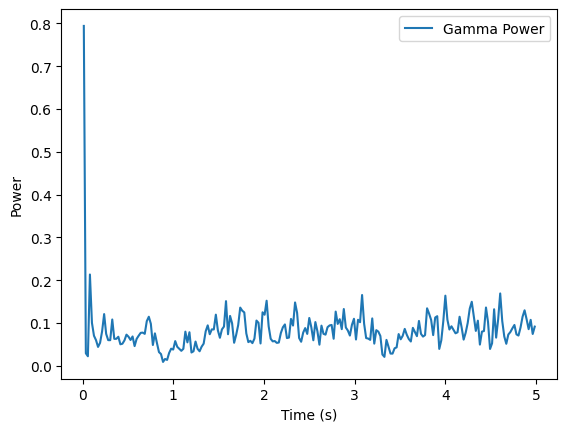

In [15]:
# Plot gamma scalar power over time
plt.plot(times, gamma_scalar_power, label="Gamma Power")
plt.xlabel("Time (s)")
plt.ylabel("Power")
plt.legend()

# Specify the figure name including the pickle file name
fig_name = f"gamma_power_{pickle_file_name}.png"

# Specify the complete save path for the figure
save_path = os.path.join(save_folder, fig_name)

# Save the figure to the specified folder
plt.savefig(save_path)

plt.show()

_Fourier transform_


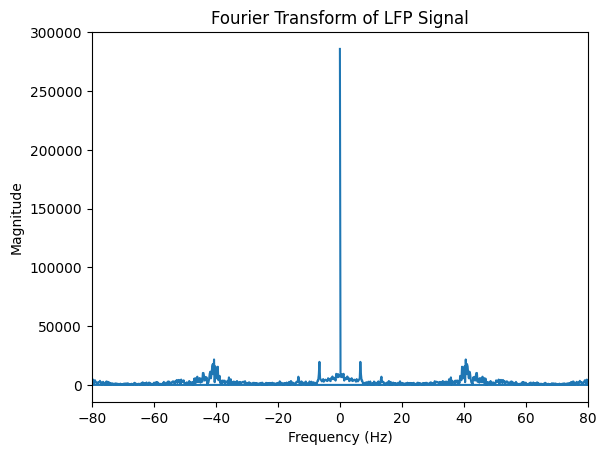

In [16]:
# Compute the Discrete Fourier Transform (DFT)
frequencies = np.fft.fftfreq(len(lfp_signal), d=1 / sampling_rate)
fft_values = np.fft.fft(lfp_signal)

# Plot the magnitude spectrum
plt.plot(frequencies, np.abs(fft_values))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of LFP Signal")
# Zoom in on the frequency range of interest
plt.xlim([-80, 80])

# Specify the figure name including the pickle file name
fig_name = f"FFT_LFP_{pickle_file_name}.png"

# Specify the complete save path for the figure
save_path = os.path.join(save_folder, fig_name)

# Save the figure to the specified folder
plt.savefig(save_path)

plt.show()

In [17]:
# # Can also use the following to get the spike times
# class Cell:
#     def __init__(self, spike_times):
#         self.spike_times = spike_times

# cells = []
# for i in spike_times_array:
#     cells.append(Cell(i))

spike_times_array = []

idx = 0
for pop in pop_list:
    for i, cell in enumerate(pop.cell):
        spike_times = pop.ltimevec[i]
        cell._gid = idx
        cell.spike_times = pop.ltimevec[i]
        spike_times_array.append(spike_times)
        idx += 1

# print(spike_times_array)
# print(len(total_pop))

# Convoluted spike times


numprocs=1
1200
800
200
200


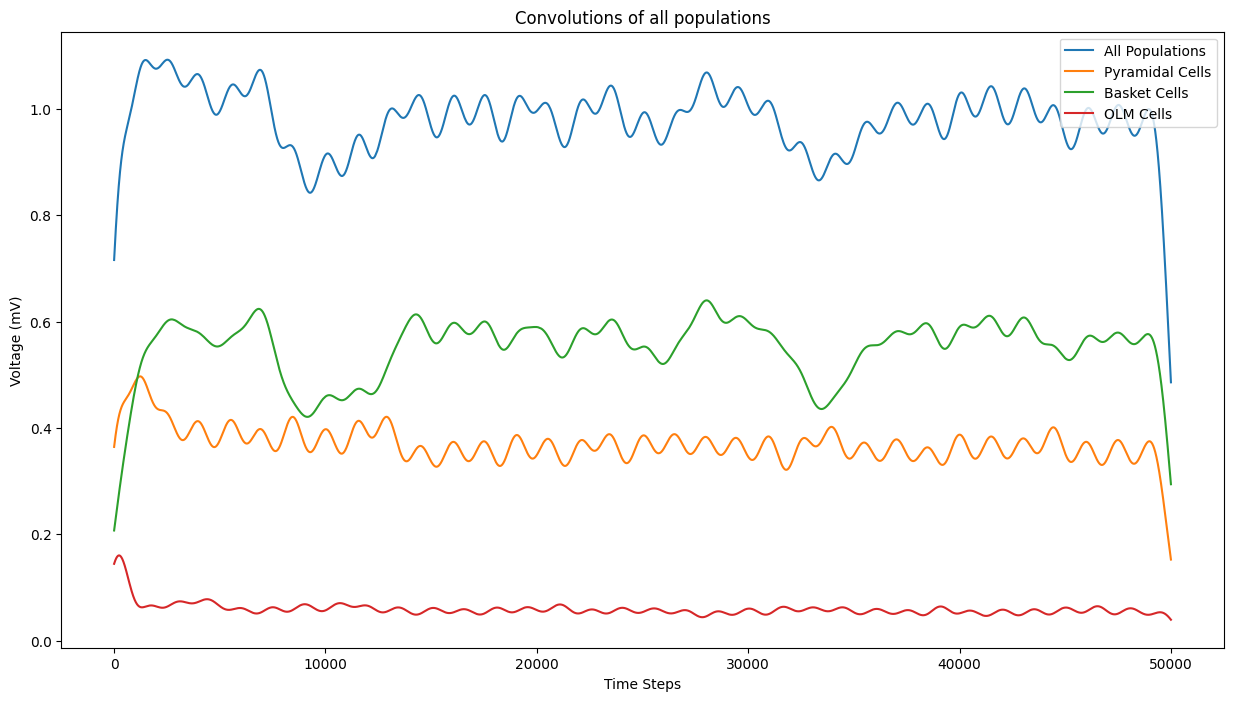

In [18]:
from SynapticaSims import Plotting

# Define cells, pyr_cells, bas_cells, and olm_cells
cells = [cell for pop in pop_list for cell in pop.cell]
pyr_cells = [cell for cell in cells if cell in pyr_population.cell]
bas_cells = [cell for cell in cells if cell in bas_population.cell]
olm_cells = [cell for cell in cells if cell in olm_population.cell]

print(len(cells))
print(len(pyr_cells))
print(len(bas_cells))
print(len(olm_cells))

# Plotting of convoluted spike times, length of sim = 50000 ms
plt.figure(figsize=(15, 8))
plt.title("Convolutions of all populations")
plt.xlabel("Time Steps")
plt.ylabel("Voltage (mV)")

result = Plotting.fast_convolution_threaded(cells, 12, sig_len=50_000, dt=0.1)
plt.plot(result, label="All Populations")

result = Plotting.fast_convolution_threaded(pyr_cells, 12, sig_len=50_000, dt=0.1)
plt.plot(result, label="Pyramidal Cells")

result = Plotting.fast_convolution_threaded(bas_cells, 12, sig_len=50_000, dt=0.1)
plt.plot(result, label="Basket Cells")

result = Plotting.fast_convolution_threaded(olm_cells, 12, sig_len=50_000, dt=0.1)
plt.plot(result, label="OLM Cells")

plt.legend()

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'Cell spikes'}, xlabel='Simulation time (ms)', ylabel='Cell ID'>)

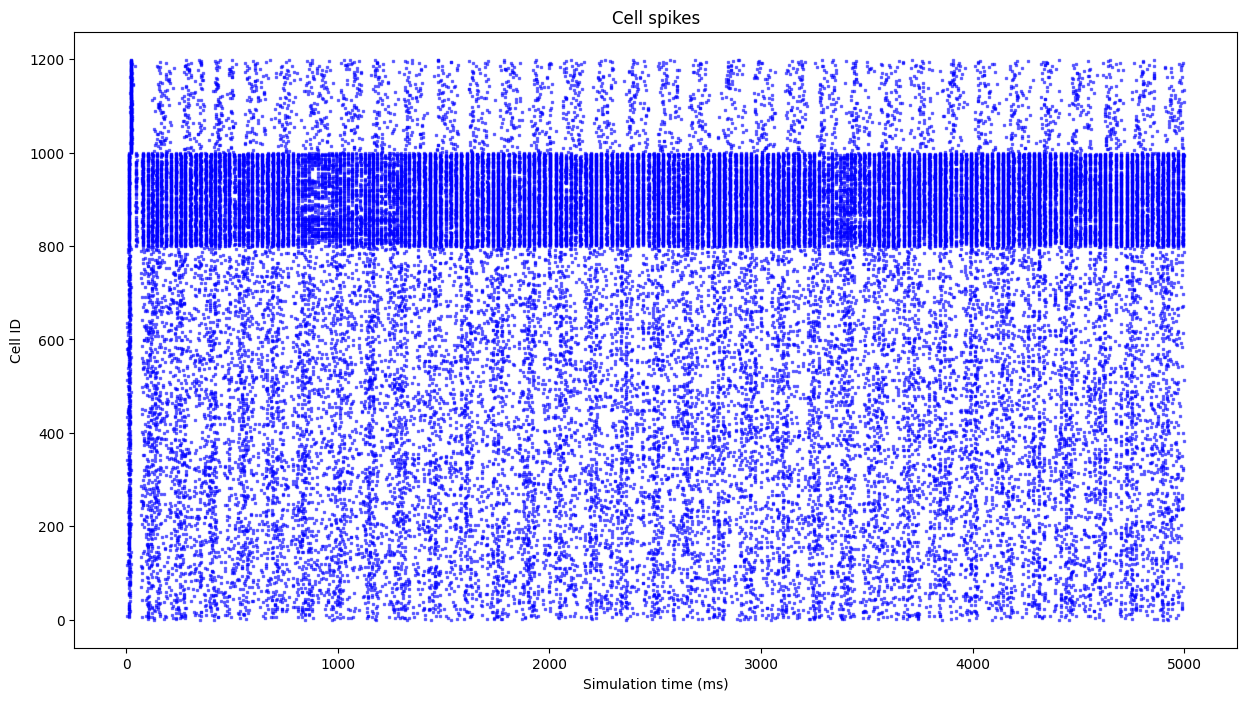

In [19]:
Plotting.plot_spikes(cells)
# Plotting.plot_spikes(pyr_cells)
# Plotting.plot_spikes(bas_cells)
# Plotting.plot_spikes(olm_cells)